In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
mort_df = pd.read_csv(f'./FEDFUNDS.csv', header = None, names = ['Date', 'rates'], parse_dates = True)
mort_df['Date'] = pd.to_datetime(mort_df['Date'])
vix_df = pd.read_csv('./vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

scatter = pd.merge(mort_df, vix_df, how = 'inner', on = 'Date')

scatter = scatter.set_index(["Date"])
scatter = scatter.resample("M").mean() 
scatter.index = pd.to_datetime(scatter.index, format="%Y%m").to_period('M')

m_rates = scatter['rates'].pct_change()[1:]
m_vix = scatter['$VIX'].pct_change()[1:]
corr_coef = np.corrcoef(m_rates, m_vix)[0][1]

(7306.0, 19236.0)

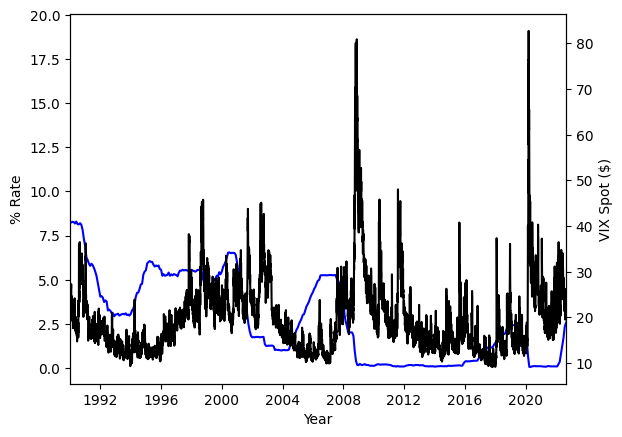

In [ ]:
# PLOT LEFT: 30 YR RATE
# PLOT RIGHT: VIX spot price

fig, ax1 = plt.subplots()
ax1.plot(mort_df['Date'], mort_df['rates'], color = "blue")
ax1.set_xlabel("Year")

ax1.set_ylabel("% Rate")

ax2 = ax1.twinx()
ax2.plot(vix_df['Date'], vix_df['$VIX'], color = "black")

ax2.set_ylabel("VIX Spot ($)")

ax1.set_xlim(max(min(mort_df['Date']), min(vix_df['Date'])), max(mort_df['Date']))

(7394.0, 19265.0)

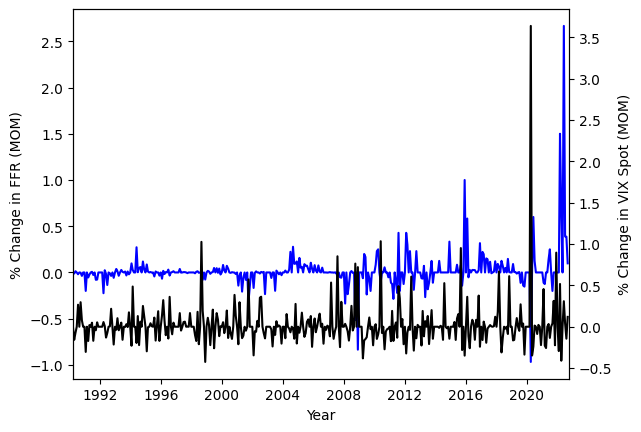

In [ ]:
# PLOT LEFT: 30 YR RATE PCT CHANGE
# PLOT RIGHT: VIX spot price PCT CHANGE

fig, ax1 = plt.subplots()
ax1.plot(m_rates.index.to_timestamp(), m_rates, color = "blue")
ax1.set_xlabel("Year")

ax1.set_ylabel("% Change in FFR (MOM)")

ax2 = ax1.twinx()
ax2.plot(m_vix.index.to_timestamp(), m_vix, color = "black")

ax2.set_ylabel("% Change in VIX Spot (MOM)")

ax1.set_xlim(min(m_vix.index), max(m_vix.index))

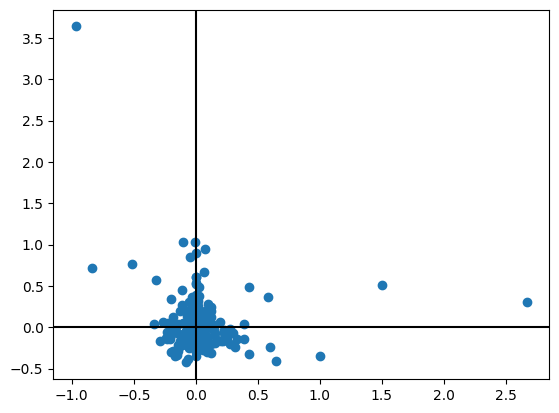

In [ ]:
plt.scatter(m_rates, m_vix)
plt.axvline(color="black")
plt.axhline(color="black")
plt.show()

In [ ]:
corr_coef

-0.17645880060774702

<AxesSubplot: >

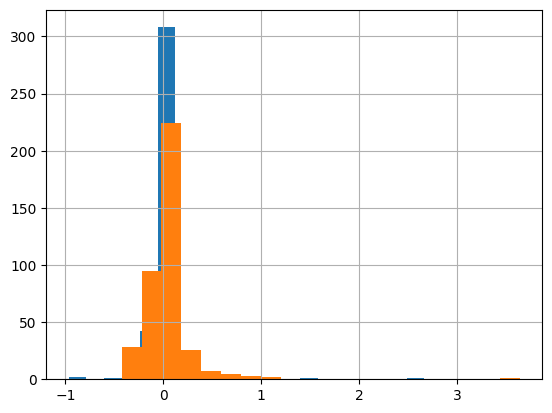

In [ ]:
m_rates.hist(bins=20)
m_vix.hist(bins=20)

In [ ]:
month_changes_df = pd.DataFrame()
month_changes_df['Date'] = m_rates.index
month_changes_df['month_change_FFR_rates'] = m_rates.values
month_changes_df['month_change_vix_spot'] = m_vix.values

In [ ]:
month_changes_df.head()

,Date,month_change_FFR_rates,month_change_vix_spot
0,1990-03,0.004854,-0.119421
1,1990-04,0.000000,0.000000
2,1990-05,-0.012077,-0.158447
3,1990-06,0.013447,-0.072708
4,1990-07,0.000000,0.000000


In [ ]:
bin_month_changes = pd.cut(month_changes_df['month_change_FFR_rates'], bins = )

In [ ]:
bins = []
for bin in bin_month_changes:
    if bin not in bins:
        bins.append(bin)
        

In [ ]:
month_changes_df['bins'] = bin_month_changes

In [ ]:
#month_changes_df[month_changes_df['bins'] == month_changes_df['bins'][0]]['month_change_vix_spot'].describe()

In [ ]:
avg_df = pd.DataFrame()
avg_df = month_changes_df.groupby('bins').month_change_vix_spot.mean()   
#avg_df

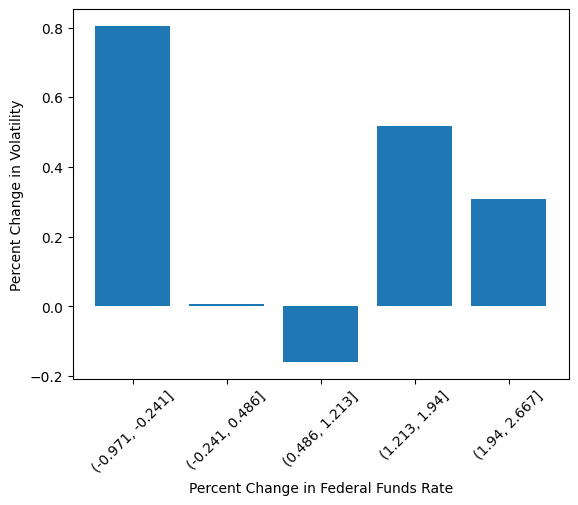

In [ ]:
plt.bar(avg_df.index.categories.astype(str), avg_df.values)
plt.ylabel("Percent Change in Volatility")
plt.xlabel("Percent Change in Federal Funds Rate")
plt.xticks(rotation=45)
plt.show()

(7306.0, 19236.0)

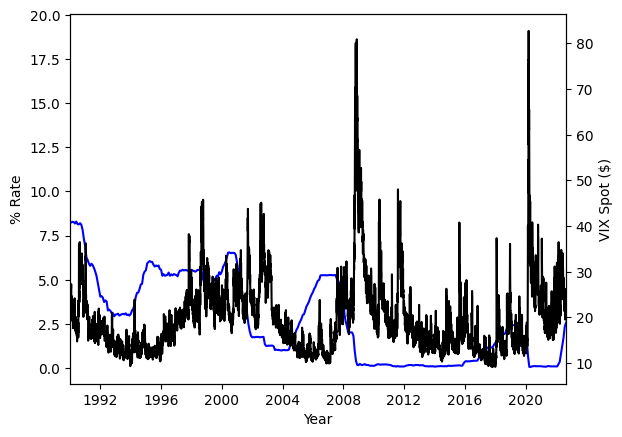